# Turkiye Student Evaluation
In this project, we aims to explore Turkiye student dataset. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import the dataset

In [2]:
# Get and read the data
direct_link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00262/turkiye-student-evaluation_generic.csv'
df = pd.read_csv(direct_link)

We make sure that the dataset contains no missing data

In [3]:
df.isnull().values.any()

False

## Exploring the Data

We begin by finding which class has the most active student. The student enrolled in that class will give the most response to the class. One problem with this is that the classes don't necessarily to have same amount of student. But, for now, assuming that they do.

In [4]:
df['class'].value_counts()

3     904
13    841
5     656
9     571
6     558
8     500
11    484
10    448
1     303
7     187
4     187
2     140
12     41
Name: class, dtype: int64

Class 3 has the most response (with class 13 closely following). Plotting a graph it to see it visually.

[Text(0, 0.5, 'number of responses')]

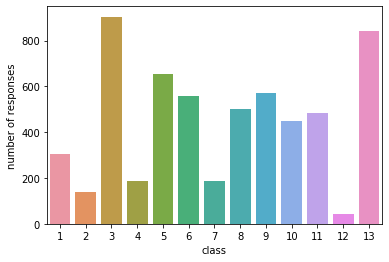

In [5]:
# Plot frequency of responses vs class
cc = sns.countplot(x='class', data=df)
cc.set(ylabel='number of responses')

From teh graph we can see class 3 has the most response.Based on the response, it is not clear if the students liked or disliked the class.

Filtering all the class 3 data.

In [6]:
# filtering the dataset to data with response from class 3 only
df_3 = df[df['class'] == 3]

Course 3 is the has the most response, which means it has the most student. We can assume that course 3 is probably first year course-an introductory course, so it must be relatively easy for students.

In [7]:
df_3['difficulty'].value_counts()

1    334
4    204
3    181
5    157
2     28
Name: difficulty, dtype: int64

334 students say it is level 1 difficult.
204 said it is level 4 difficult and only 28 said it is level 28 difficult. 
It was that level 2 should've been the 2nd most responses. 
Will have to check why is there such a drastic changes (level 1 and level 4)??

Plotting graph!

Text(0.5, 1.0, 'Difficulty of class 3')

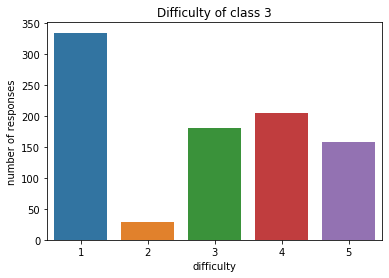

In [8]:
cd = sns.countplot(x='difficulty', data=df_3)
cd.set(ylabel='number of responses')
plt.title('Difficulty of class 3')

It is safe to say that the lower the difficulty is, the higher likeness of student against the class is. One big portion student like the class while another big portion dislike it. 
Will findout if the student who say it is easy really like it or not.

filtering the data and getting data where student say class 3 is easy.

In [9]:
# filter student who say class 3 is easy
df_3_easy = df_3[df_3['difficulty'] == 1]

Going to examine the following quesonnaire response:
- Q3: The course was worth the amount of credit assigned to it.
- Q8: The quizzes, assignments, projects and exams contributed to helping the learning.
- Q9: I greatly enjoyed the class and was eager to actively participate during the lectures.


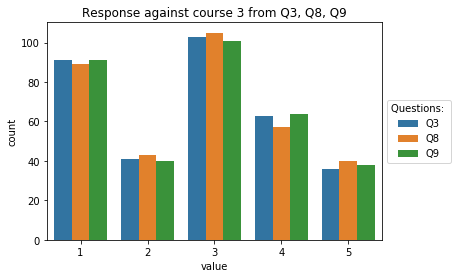

In [10]:
df_3_easy_ques = df_3_easy[['Q3', 'Q8', 'Q9']]
qc = sns.countplot(x="value", hue="variable", data=pd.melt(df_3_easy_ques))
plt.title('Response against course 3 from Q3, Q8, Q9')
plt.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, title='Questions: ')

We can see, the response is pretty similar among each question. Turns out, most student says course 3 is average in all of these questions. Also, a big part of them dislike  the course (we can see a huge number of 1s given as response)

We can then conclude:
Student who said the class being easy (gave level 1 difficulty) didn't necessarily like the class (not much 5s from Q3, Q8, Q9), in fact they said the course is mostly average (based on Q3, Q8 and Q9)

It could be instructur issue? Concidentally, course 3 is managed by instructor 3.

first filtering the data and to get all response in instructor 3's course.

In [11]:
# getting response data from all course of instructor 3
df_instr_3 = df[df['instr'] == 3]

In [12]:
df_instr_3['class'].value_counts()

3     904
13    742
5     656
9     571
8     500
4     187
12     41
Name: class, dtype: int64

Instructor 3 manage 7 courses, so I will examine how the instrutor is doing with the top 5 of those courses.

In [13]:
# getting the top 5 courses
top_5 = [3, 13, 5, 9, 8]

# filter the data by top 5 courses
df_instr_3_top5 = df_instr_3[df_instr_3['class'].isin(top_5)]

Have to evaluate the instructor on the following questions:
- Q13: The Instructor's knowledge was relevant and up to date.
- Q20: The Instructor explained the course and was eager to be helpful to students
- Q23: The Instructor encouraged participation in the course.

All of these questions are related to how the instructor is doing on the course

In [14]:
df_instr_3_top5_ques = df_instr_3_top5[['Q13', 'Q20', 'Q23']]

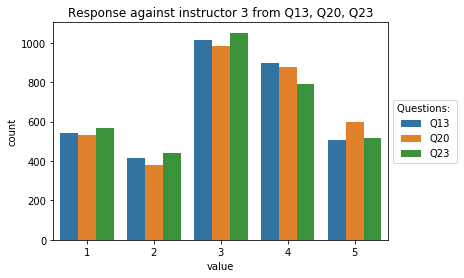

In [15]:
ic = sns.countplot(x="value", hue="variable", data=pd.melt(df_instr_3_top5_ques))
plt.title('Response against instructor 3 from Q13, Q20, Q23')
plt.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, title='Questions: ')

Mostly average. However, we can see a lot of 4s and 5s, which mean the instructor is generally well-liked and doing good in the course.

#### How about instructor 3 as a person? How well is he/her doing?

Going to examine the instructor on the following questions:
- Q14: The Instructor came prepared for classes
- Q17: The Instructor arrived on time for classes.
- Q19: The Instructor made effective use of class hours.
- Q21: The Instructor demonstrated a positive approach to students.
- Q28: The Instructor treated all students in a right and objective manner.

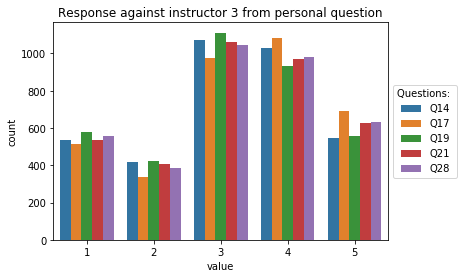

In [16]:
#taking all those questions column name to a list
personal_ques = ['Q14', 'Q17', 'Q19', 'Q21', 'Q28']

df_instr_3_personal = df_instr_3[personal_ques]
prsc = sns.countplot(x="value", hue="variable", data=pd.melt(df_instr_3_personal))
plt.title('Response against instructor 3 from personal question')
plt.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, title='Questions: ')

Conclusion: instructor 3 is a good instrutor. He/she came prepared, arrived on time, used office hours, was positive against student and treated student fairly. Instructor 3 is just the ideal instructor you could think of :p

## Conclusion

- Student who said course 3 is easy (level 1 difficulty) don't necessarily enjoy the class (Q9), they also didn't feel is the course helping them learning (maybe because the class is to easy??). ALso, they thought amount of credits is not fair for that class. This doesn't seems right, right?
- The previous problem is certainly not because of the instructor. Instructor 3 (who also manage course 3) is doing just fine in his/her class. The instructor is well-liked among students.